# Recurrent Neural Networks on **`Sin wave function`**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
x = np.linspace(0, 50, 501)
y = np.sin(x)

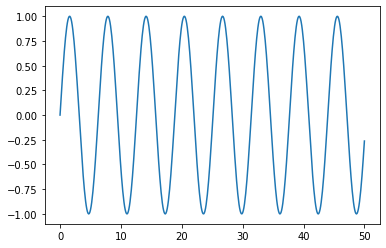

In [3]:
plt.plot(x, y)

In [4]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


# Train Test Split

In [5]:
test_size = round(len(df) * 0.1)
split_index = len(df) - test_size
split_index

451

In [6]:
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

In [7]:
train_df.tail()

,Sine
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208
45.0,0.850904


In [8]:
test_df.head()

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


In [9]:
print(f'Train shape: {train_df.shape}')
print(f'Test shape: {test_df.shape}')

Train shape: (451, 1)
Test shape: (50, 1)


# Scale Data

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)

train = scaler.transform(train_df)
test = scaler.transform(test_df)

# Time Series Generator

In [11]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 49
batch_size = 1
generator = TimeseriesGenerator(train, train, length=length, batch_size=batch_size)
validation = TimeseriesGenerator(test, test, length=length, batch_size=batch_size)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

n_features = 1

model = Sequential()
model.add(SimpleRNN(50, input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(generator, epochs=15, validation_data=validation)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 402 steps, validate for 1 steps
Epoch 1/15
402/402 [==============================] - 22s 54ms/step - loss: 0.0159 - val_loss: 5.5635e-05
Epoch 2/15
402/402 [==============================] - 20s 49ms/step - loss: 5.1778e-05 - val_loss: 1.1986e-05
Epoch 3/15
402/402 [==============================] - 21s 51ms/step - loss: 8.0703e-05 - val_loss: 3.1262e-05
Epoch 4/15
402/402 [==============================] - 23s 57ms/step - loss: 2.3121e-04 - val_loss: 2.0051e-04
Epoch 5/15
402/402 [==============================] - 22s 54ms/step - loss: 7.9852e-05 - val_loss: 1.4296e-05
Epoch 6/15
402/402 [==============================] - 21s 52ms/step - loss: 1.4094e-04 - val_loss: 2.5218e-04
Epoch 7/15
402/402 [==============================] - 21s 53ms/step - loss: 5.9111e-05 - val_loss: 1.1337e-05
Epoch 8/15
402/402 [==============================] - 22s 54ms/step - loss: 1.4491e-04 - val_loss: 2.7666e-07
Epoch 9/15
402/402 [============

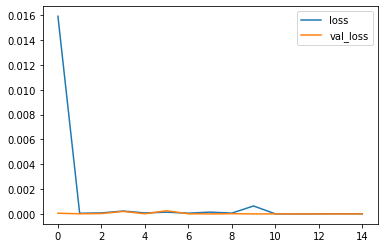

In [15]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [16]:
first_eval_batch = train[-length:]
# first_eval_batch

In [17]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

print(f"Model prediction: {model.predict(first_eval_batch)}")
print(f"True value: {test[0]}")

Model prediction: [[0.945602]]
True value: [0.94955134]


In [18]:
test_predictions = []

first_eval_batch = train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [19]:
# test_predictions

In [20]:
test_pred = scaler.inverse_transform(test_predictions)
# test_pred

In [21]:
test_df['pred'] = test_pred
test_df.head()

/home/fares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sine,pred
45.1,0.899097,0.891199
45.2,0.938307,0.923323
45.3,0.968142,0.947339
45.4,0.988304,0.961952
45.5,0.998591,0.966658


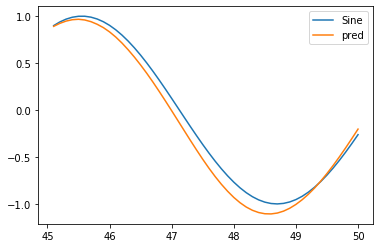

In [22]:
test_df.plot()

# Training LSTM model

In [23]:
model_1 = Sequential()
model_1.add(LSTM(50, activation='relu', input_shape=(length, n_features)))
model_1.add(Dense(1))

model_1.compile(optimizer='adam', loss='mse')

In [24]:
model_1.fit(generator, epochs=20, validation_data=validation)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 402 steps, validate for 1 steps
Epoch 1/20
402/402 [==============================] - 46s 114ms/step - loss: 0.0710 - val_loss: 2.9144e-04
Epoch 2/20
402/402 [==============================] - 48s 118ms/step - loss: 0.0047 - val_loss: 3.3920e-04
Epoch 3/20
402/402 [==============================] - 49s 122ms/step - loss: 1.0519e-04 - val_loss: 1.6221e-05
Epoch 4/20
402/402 [==============================] - 48s 119ms/step - loss: 3.5108e-05 - val_loss: 4.0065e-05
Epoch 5/20
402/402 [==============================] - 47s 118ms/step - loss: 6.1473e-05 - val_loss: 3.1679e-06
Epoch 6/20
402/402 [==============================] - 49s 121ms/step - loss: 6.0552e-05 - val_loss: 1.0078e-05
Epoch 7/20
402/402 [==============================] - 49s 122ms/step - loss: 1.5403e-04 - val_loss: 8.8257e-05
Epoch 8/20
402/402 [==============================] - 49s 122ms/step - loss: 1.5205e-04 - val_loss: 1.7526e-05
Epoch 9/20
402/402 [========

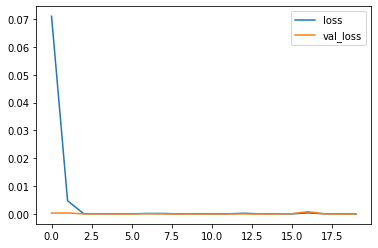

In [25]:
losses = pd.DataFrame(model_1.history.history)
losses.plot()

In [26]:
test_predictions = []

first_eval_batch = train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model_1.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [27]:
test_pred = scaler.inverse_transform(test_predictions)
test_df['LSTM'] = test_pred

/home/fares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


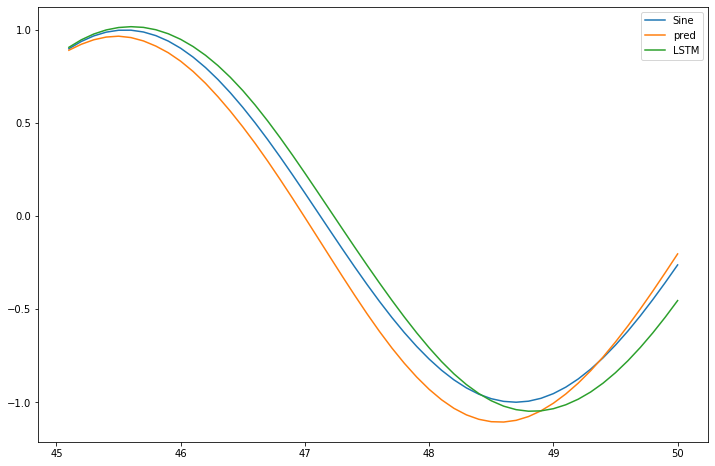

In [28]:
test_df.plot(figsize=(12, 8));

# Forecasting

In [29]:
full_scaler = MinMaxScaler()
scaled_df = full_scaler.fit_transform(df)

length = 50
generator = TimeseriesGenerator(scaled_df, scaled_df, length=length, batch_size=1)

In [ ]:
model_1 = Sequential()
model_1.add(LSTM(50, input_shape=(length, n_features)))
model_1.add(Dense(1))

model_1.compile(optimizer='adam', loss='mse')

model_1.fit(generator, epochs=10)

  ...
    to  
  ['...']
Train for 451 steps
Epoch 1/10
451/451 [==============================] - 23s 51ms/step - loss: 0.0152
Epoch 2/10
451/451 [==============================] - 21s 47ms/step - loss: 2.0839e-04
Epoch 3/10
451/451 [==============================] - 23s 51ms/step - loss: 1.8173e-04
Epoch 4/10
451/451 [==============================] - 23s 51ms/step - loss: 3.5934e-04
Epoch 5/10
451/451 [==============================] - 24s 54ms/step - loss: 1.1128e-04
Epoch 6/10
451/451 [==============================] - 24s 53ms/step - loss: 7.3931e-04
Epoch 7/10
451/451 [==============================] - 24s 53ms/step - loss: 1.1019e-04
Epoch 8/10
168/451 [==========>...................] - ETA: 15s - loss: 1.2840e-05